In [60]:
import pickle
from pprint import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
att = pickle.load(open("../../results/attacks/trend_micro_full/langrange_net_fgsm_FPR_0.1_adjusted_grad_new_features_l_u_0.05/attackGRAD.pickle", "rb"))

In [5]:
import sys
sys.path.extend(['/Users/Wattik 1/Library/Mobile Documents/com~apple~CloudDocs/skola/Thesis', '/Users/Wattik 1/Library/Mobile Documents/com~apple~CloudDocs/skola/Thesis/sources'])

In [7]:
att

In [22]:
from models.query_profiles import NoQueriesProfile

In [19]:
def criticals(qp):
    critical = sorted(qp.base_qp.requests, key=lambda r: r.time)
    return critical

def ratios(qp):
    cr = criticals(qp)
    mal = [r for r in cr if r.query == "toknowall.com"]
    unk = [r for r in cr if r.query == "unknown_crafted_url.com"]
    return len(mal), len(unk)

In [38]:
mals = []
no_act = []
unks = []

for qp in att.get_query_profiles():
    no_act.append("NO-ACT" if isinstance(qp, NoQueriesProfile) else "ATTACK")
    mal, unk = ratios(qp)
    mals.append(mal)
    unks.append(unk)
    #pprint([str(r) for r in criticals(qp)])
    #print(ratios(qp))
    #att_len = len(qp.requests) - len(qp.base_qp.requests)
    #attack_length.append(att_len)
        

In [39]:
df = pd.DataFrame({
    "mals": mals,
    "no_act": no_act,
    "unks": unks
})

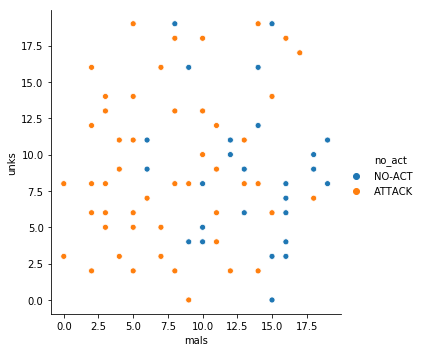

In [40]:
g = sns.relplot(x="mals", y="unks", hue="no_act", height=5, data=df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


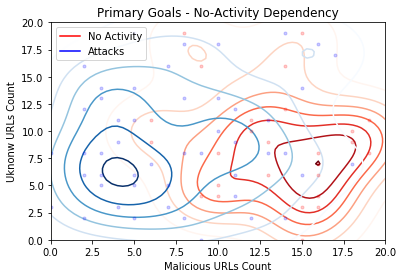

In [82]:
no_act_idx = df["no_act"] == "NO-ACT"
sns.kdeplot(df[no_act_idx].mals, df[no_act_idx].unks, cmap="Reds", legend=True,  n_levels=7, label="No Activity", color="red")
sns.kdeplot(df[~no_act_idx].mals, df[~no_act_idx].unks, cmap="Blues", legend=True,  n_levels=7, label="Attacks", color="blue")
plt.plot(df[no_act_idx].mals.as_matrix(), df[no_act_idx].unks.as_matrix(), ".", color="red", alpha=0.2, label=None)
plt.plot(df[~no_act_idx].mals.as_matrix(), df[~no_act_idx].unks.as_matrix(), ".", color="blue", alpha=0.2)
plt.xlabel("Malicious URLs Count")
plt.ylabel("Uknonw URLs Count")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.legend()
plt.title("Primary Goals - No-Activity Dependency")
plt.savefig("attacks-trend.png", dpi=150)